# Nonlinear Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math , copy

In [2]:
data = np.loadtxt("prob1data.txt",delimiter=",")
train_x_data = data[0,:]
train_y_data = data[1,:]
print("The X(Time) of the training data")
display(train_x_data)
print("--------------------------------")
print("The y(The height of the ball) of the training data")
display(train_y_data)

                  

The X(Time) of the training data


array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
       1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
       1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16,
       2.2 , 2.24, 2.28, 2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 ,
       2.64, 2.68, 2.72, 2.76])

--------------------------------
The y(The height of the ball) of the training data


array([-0.49440425, -0.37673774,  0.67663803,  2.4000521 ,  2.1663244 ,
        2.41029993,  2.91287025,  3.26620304,  4.41522946,  5.0306577 ,
        4.43889901,  5.0521549 ,  4.72286988,  6.34598715,  5.39815011,
        6.51312526,  6.70427439,  8.10139399,  6.74671941,  8.51875768,
        8.45491253,  8.91782029,  9.34838901,  7.90436401,  8.76745756,
        8.99088773,  9.45387448,  9.32753517,  9.88577771,  9.66196969,
        9.84021772,  9.38651616, 10.34782968,  9.51216133,  9.83399103,
        9.97514103,  9.65873261,  9.35055155,  8.83348823, 10.50267796,
        8.70018149, 10.30833125,  8.49656894,  8.9351943 ,  9.50405613,
        8.48421939,  8.64066872,  9.11296156,  8.50769076,  7.69441505,
        8.36850861,  7.50625973,  7.64771663,  7.30905207,  7.70926389,
        6.85814371,  5.66188086,  5.36040173,  6.51427657,  5.78256088,
        5.52891673,  5.04310815,  4.87157154,  4.20230677,  2.63101509,
        2.85291313,  1.90550867,  0.94140632,  1.23214168,  0.41

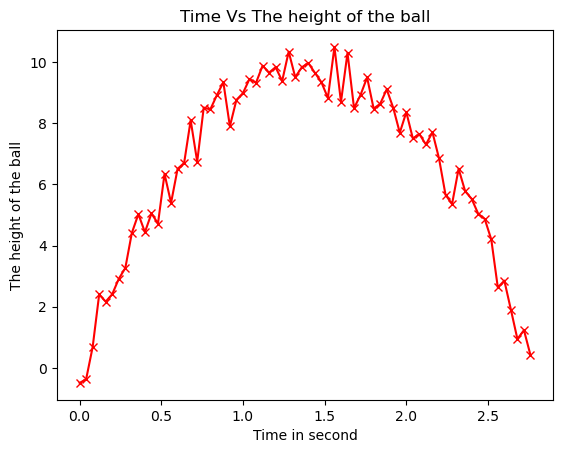

In [3]:
plt.plot(train_x_data,train_y_data,marker='x',c='r')
plt.title("Time Vs The height of the ball")
plt.xlabel("Time in second")
plt.ylabel("The height of the ball")
plt.show()

In [4]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost =0
    for i in range(m):
        f_w_b = w*((x[i]))**2 + b
        cost = cost + (f_w_b - y[i])**2
    total_cost = cost/(2*m)
    return total_cost

In [5]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_w_b = w*((x[i]))**2 + b
        dj_dw_i = (f_w_b - y[i])*(x[i])**2
        dj_db_i = (f_w_b-y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw,dj_db  

In [6]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
    j_his = []
    p_his =[]
    w = copy.deepcopy(w_in)
    w = w_in
    b = b_in 
    for i in range(num_iters):
        dj_dw,dj_db = gradient_function(x,y,w,b)
        w = w -alpha*dj_dw
        b = b -alpha*dj_db
        if i < 100000:
            j_his.append(cost_function(x,y,w,b))
            p_his.append([w,b])
        if i%math.ceil(num_iters/10)==0:
            print(f"Iteration {i:4} , Cost {j_his[-1]:0.2e}",
                 f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w,b,j_his,p_his

In [22]:
#initialize the parameters
import random
random.seed(1)
w_in =random.uniform(-10,10)
b_in = random.uniform(-10,10)
alpha = 0.01
num_iters = 50000
w_final, b_final, J_his, p_his = gradient_descent(train_x_data,train_y_data,w_in,b_in,alpha,num_iters,compute_cost,compute_gradient)


Iteration    0 , Cost 2.36e+02 dj_dw: -8.453e+01, dj_db: -1.832e+01   w: -6.467e+00, b: 7.13188e+00
Iteration 5000 , Cost 4.37e+00 dj_dw: -6.225e-11, dj_db:  2.782e-10   w: -2.267e-01, b: 7.14602e+00
Iteration 10000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14602e+00
Iteration 15000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14602e+00
Iteration 20000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14602e+00
Iteration 25000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14602e+00
Iteration 30000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14602e+00
Iteration 35000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14602e+00
Iteration 40000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14602e+00
Iteration 45000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14

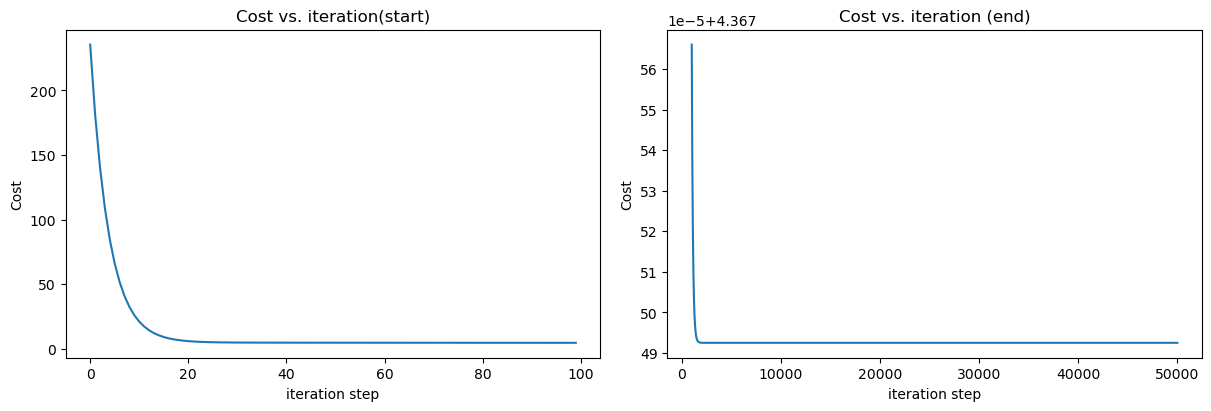

In [23]:
fig,(ax1,ax2) = plt.subplots(1,2,constrained_layout =True,figsize=(12,4))
ax1.plot(J_his[:100])
ax2.plot(1000+np.arange(len(J_his[1000:])),J_his[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()    


In [9]:
# using the Stochastics gradient descent
def stoc_gradient_descent(x,y,w_init,b_init,alpha,num_iters,cost_function):
    j_his = []
    p_his =[]
    w = copy.deepcopy(w_in)
    w = w_init
    b = b_init
    m = train_x_data.shape[0]
    for i in range(num_iters):
        dj_w = 0
        dj_b = 0
        for j in range(m):
            np.random.seed(1)
            ri = np.random.randint(m)
            res_w_b = w*((x[j]))**2 + b - y[j]
            dj_w += (res_w_b*(x[j])**2)/m
            dj_b += (res_w_b)/m
            w = w - alpha*dj_w
            b = b - alpha*dj_b
        if i < 100000:
            j_his.append(cost_function(x,y,w,b))
            p_his.append([w,b])
        if i%math.ceil(num_iters/10)==0:
            print(f"Iteration {i:4} , Cost {j_his[-1]:0.2e}",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w,b,j_his,p_his



In [17]:
#import random
#random.seed(1)
w_init = 0.16
b_init = 2
alpha = 0.01
num_iters = 500
w_final, b_final, J_his, p_his = stoc_gradient_descent(train_x_data,train_y_data,w_init,b_init,alpha,num_iters,compute_cost)



Iteration    0 , Cost 1.08e+01 w:  1.332e+00, b: 3.21096e+00
Iteration   50 , Cost 5.81e+00 w:  4.964e-01, b: 5.62605e+00
Iteration  100 , Cost 5.81e+00 w:  4.964e-01, b: 5.62610e+00
Iteration  150 , Cost 5.81e+00 w:  4.964e-01, b: 5.62610e+00
Iteration  200 , Cost 5.81e+00 w:  4.964e-01, b: 5.62610e+00
Iteration  250 , Cost 5.81e+00 w:  4.964e-01, b: 5.62610e+00
Iteration  300 , Cost 5.81e+00 w:  4.964e-01, b: 5.62610e+00
Iteration  350 , Cost 5.81e+00 w:  4.964e-01, b: 5.62610e+00
Iteration  400 , Cost 5.81e+00 w:  4.964e-01, b: 5.62610e+00
Iteration  450 , Cost 5.81e+00 w:  4.964e-01, b: 5.62610e+00


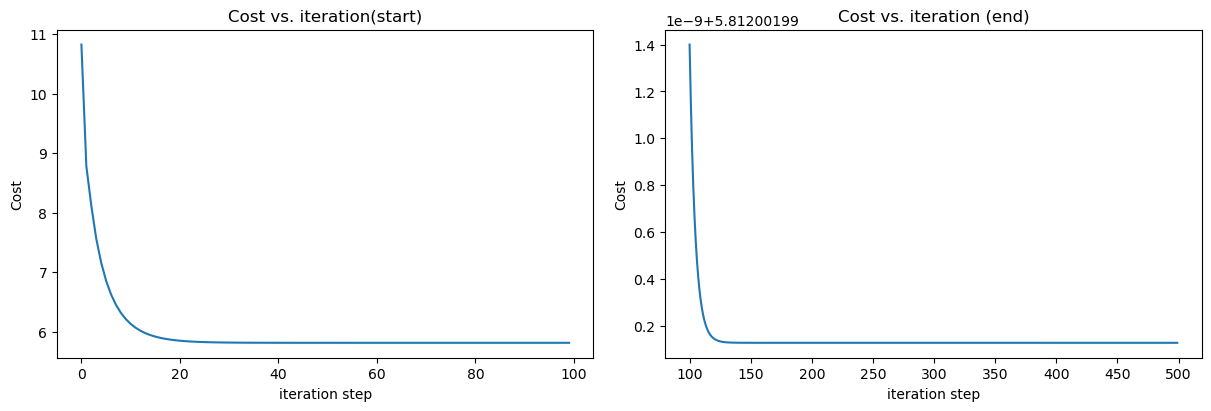

In [21]:
#fig,axis = plt.subplots(1,2,constrained_layout =True,figsize=(12,4))
fig,(ax1,ax2) = plt.subplots(1,2,constrained_layout =True,figsize=(12,4))
ax1.plot(J_his[:100])
ax2.plot(100+np.arange(len(J_his[100:])),J_his[100:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()
   


# Inferences 
From the plot and the data we can observe that the performance of batch gradient is quiet well in comparison of stochastic gradient descent. Given the same data and parameters the batch gradient converges more easily. Even the mean square error decreasesd to a lower value in the run of batch gradient descent(4.37) while in the stochastics gradient descent the mean square error fluctuate around the point(5.81). This you can observe in their plot of cost and iteration steps. One major things I observe that the result of stochastics is impacted drastically by random choice of the initial weight. In contrast the random choice of weight doesn't have any great impact on the nature of plot between cost value and iteration steps.

# Observing the effect of different alpha value on the convergence of cost function

# 1) For alpha=0.1

In [25]:
import random
random.seed(1)
w_in =random.uniform(-10,10)
b_in = random.uniform(-10,10)
alpha = 0.1
num_iters = 50000
w_final_1, b_final_1, J_his_1, p_his_1 = gradient_descent(train_x_data,train_y_data,w_in,b_in,alpha,num_iters,compute_cost,compute_gradient)

Iteration    0 , Cost 2.25e+01 dj_dw: -8.453e+01, dj_db: -1.832e+01   w:  1.141e+00, b: 8.78072e+00
Iteration 5000 , Cost 4.37e+00 dj_dw: -1.015e-16, dj_db:  4.213e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 10000 , Cost 4.37e+00 dj_dw: -1.015e-16, dj_db:  4.213e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 15000 , Cost 4.37e+00 dj_dw: -1.015e-16, dj_db:  4.213e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 20000 , Cost 4.37e+00 dj_dw: -1.015e-16, dj_db:  4.213e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 25000 , Cost 4.37e+00 dj_dw: -1.015e-16, dj_db:  4.213e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 30000 , Cost 4.37e+00 dj_dw: -1.015e-16, dj_db:  4.213e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 35000 , Cost 4.37e+00 dj_dw: -1.015e-16, dj_db:  4.213e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 40000 , Cost 4.37e+00 dj_dw: -1.015e-16, dj_db:  4.213e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 45000 , Cost 4.37e+00 dj_dw: -1.015e-16, dj_db:  4.213e-15   w: -2.267e-01, b: 7.14

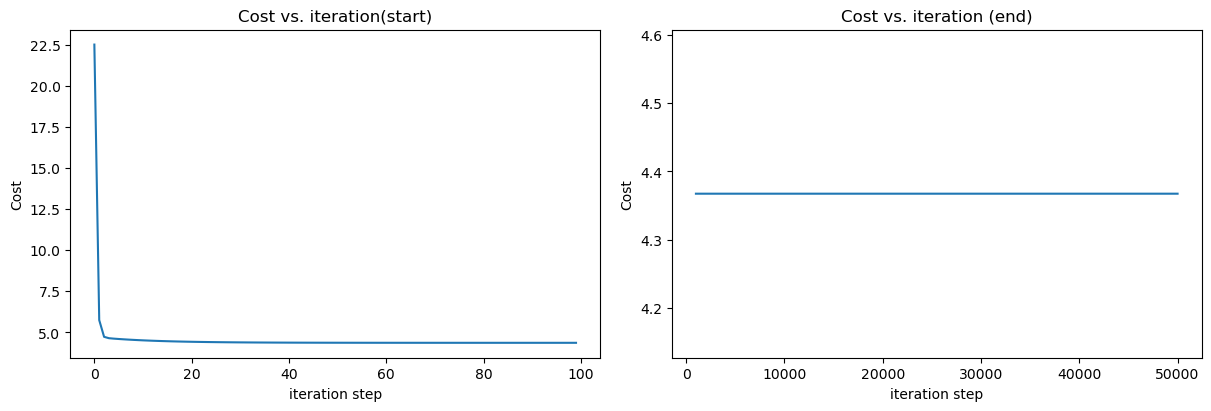

In [26]:
fig,(ax1,ax2) = plt.subplots(1,2,constrained_layout =True,figsize=(12,4))
ax1.plot(J_his_1[:100])
ax2.plot(1000+np.arange(len(J_his_1[1000:])),J_his_1[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show() 

# 2) For alpha = 0.5

In [28]:
import random
random.seed(1)
w_in =random.uniform(-10,10)
b_in = random.uniform(-10,10)
alpha = 0.5
num_iters = 50000
w_final_2, b_final_2, J_his_2, p_his_2 = gradient_descent(train_x_data,train_y_data,w_in,b_in,alpha,num_iters,compute_cost,compute_gradient)

Iteration    0 , Cost 8.19e+03 dj_dw: -8.453e+01, dj_db: -1.832e+01   w:  3.495e+01, b: 1.61089e+01


C:\Users\najka\AppData\Local\Temp\ipykernel_20588\3070818656.py:6: RuntimeWarning: overflow encountered in double_scalars
  cost = cost + (f_w_b - y[i])**2
C:\Users\najka\AppData\Local\Temp\ipykernel_20588\2372427302.py:9: RuntimeWarning: overflow encountered in double_scalars
  dj_dw += dj_dw_i
C:\Users\najka\AppData\Local\Temp\ipykernel_20588\3070818656.py:5: RuntimeWarning: invalid value encountered in double_scalars
  f_w_b = w*((x[i]))**2 + b
C:\Users\najka\AppData\Local\Temp\ipykernel_20588\2372427302.py:6: RuntimeWarning: invalid value encountered in double_scalars
  f_w_b = w*((x[i]))**2 + b


Iteration 5000 , Cost nan dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 10000 , Cost nan dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 15000 , Cost nan dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 20000 , Cost nan dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 25000 , Cost nan dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 30000 , Cost nan dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 35000 , Cost nan dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 40000 , Cost nan dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 45000 , Cost nan dj_dw:  nan, dj_db:  nan   w:  nan, b: nan


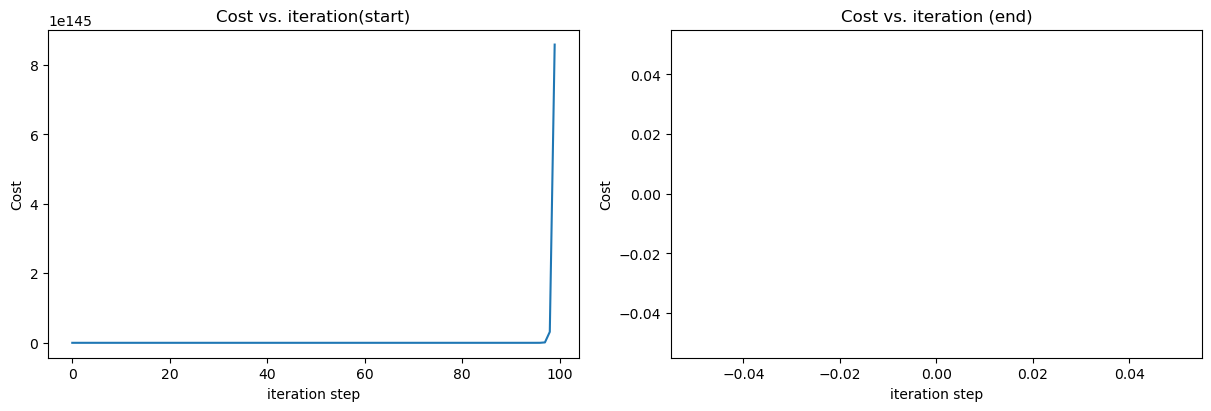

In [29]:
fig,(ax1,ax2) = plt.subplots(1,2,constrained_layout =True,figsize=(12,4))
ax1.plot(J_his_2[:100])
ax2.plot(1000+np.arange(len(J_his_2[1000:])),J_his_2[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show() 

# 3) For alpha = 0.01

In [30]:
import random
random.seed(1)
w_in =random.uniform(-10,10)
b_in = random.uniform(-10,10)
alpha = 0.01
num_iters = 50000
w_final_3, b_final_3, J_his_3, p_his_3 = gradient_descent(train_x_data,train_y_data,w_in,b_in,alpha,num_iters,compute_cost,compute_gradient)

Iteration    0 , Cost 2.36e+02 dj_dw: -8.453e+01, dj_db: -1.832e+01   w: -6.467e+00, b: 7.13188e+00
Iteration 5000 , Cost 4.37e+00 dj_dw: -6.225e-11, dj_db:  2.782e-10   w: -2.267e-01, b: 7.14602e+00
Iteration 10000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14602e+00
Iteration 15000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14602e+00
Iteration 20000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14602e+00
Iteration 25000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14602e+00
Iteration 30000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14602e+00
Iteration 35000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14602e+00
Iteration 40000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14602e+00
Iteration 45000 , Cost 4.37e+00 dj_dw: -1.015e-15, dj_db:  4.433e-14   w: -2.267e-01, b: 7.14

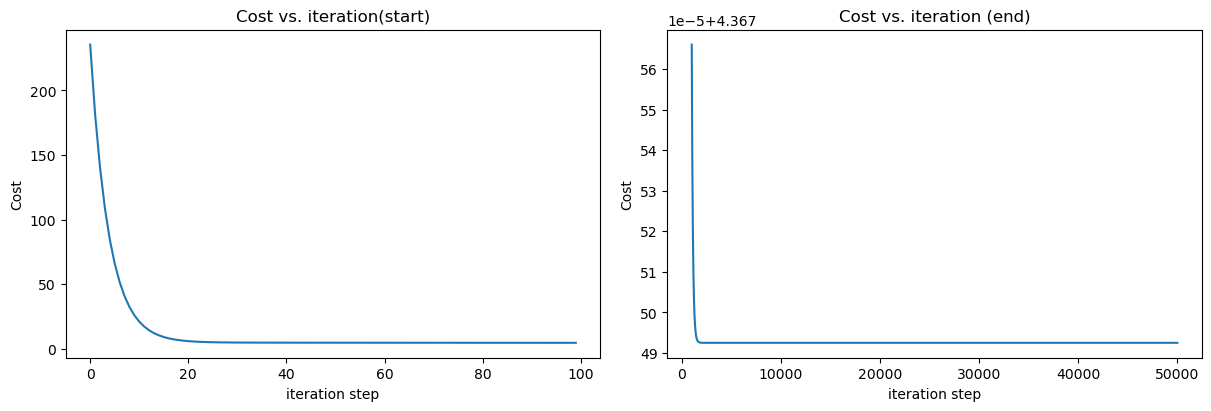

In [31]:
fig,(ax1,ax2) = plt.subplots(1,2,constrained_layout =True,figsize=(12,4))
ax1.plot(J_his_3[:100])
ax2.plot(1000+np.arange(len(J_his_3[1000:])),J_his_3[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show() 

# 4) For alpha = 0.05

In [33]:
import random
random.seed(1)
w_in =random.uniform(-10,10)
b_in = random.uniform(-10,10)
alpha = 0.05
num_iters = 50000
w_final_4, b_final_4, J_his_4, p_his_4 = gradient_descent(train_x_data,train_y_data,w_in,b_in,alpha,num_iters,compute_cost,compute_gradient)

Iteration    0 , Cost 4.78e+01 dj_dw: -8.453e+01, dj_db: -1.832e+01   w: -3.086e+00, b: 7.86470e+00
Iteration 5000 , Cost 4.37e+00 dj_dw:  5.075e-16, dj_db:  8.856e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 10000 , Cost 4.37e+00 dj_dw:  5.075e-16, dj_db:  8.856e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 15000 , Cost 4.37e+00 dj_dw:  5.075e-16, dj_db:  8.856e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 20000 , Cost 4.37e+00 dj_dw:  5.075e-16, dj_db:  8.856e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 25000 , Cost 4.37e+00 dj_dw:  5.075e-16, dj_db:  8.856e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 30000 , Cost 4.37e+00 dj_dw:  5.075e-16, dj_db:  8.856e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 35000 , Cost 4.37e+00 dj_dw:  5.075e-16, dj_db:  8.856e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 40000 , Cost 4.37e+00 dj_dw:  5.075e-16, dj_db:  8.856e-15   w: -2.267e-01, b: 7.14602e+00
Iteration 45000 , Cost 4.37e+00 dj_dw:  5.075e-16, dj_db:  8.856e-15   w: -2.267e-01, b: 7.14

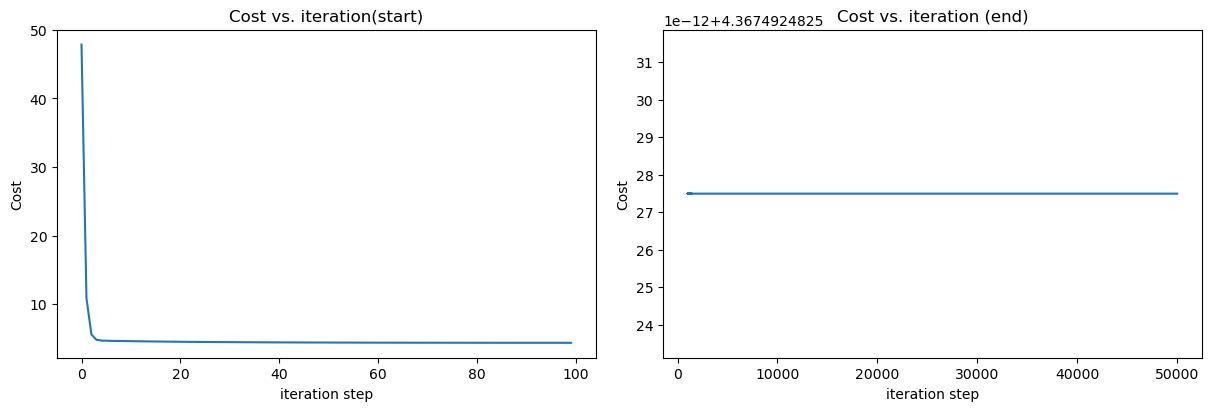

In [34]:
fig,(ax1,ax2) = plt.subplots(1,2,constrained_layout =True,figsize=(12,4))
ax1.plot(J_his_4[:100])
ax2.plot(1000+np.arange(len(J_his_4[1000:])),J_his_4[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()